# Customer buying behaviour prediction using Random Forest and XGboost 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [4]:
df.shape


(50000, 14)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [7]:
X=df.drop('booking_complete',axis=1)
y=df.booking_complete

for col in X.select_dtypes("object"):
    X[col], _=X[col].factorize()


In [8]:
X.dtypes


num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [10]:
from sklearn.feature_selection import mutual_info_classif

mi=mutual_info_classif(X,y)
mi=pd.Series(mi,name="Mutual Info",index=X.columns)
mi=mi.sort_values(ascending=False)

print(mi)

route                    0.053575
booking_origin           0.046763
flight_duration          0.016816
wants_extra_baggage      0.011733
length_of_stay           0.007284
wants_in_flight_meals    0.003677
flight_day               0.003612
wants_preferred_seat     0.002972
purchase_lead            0.002873
num_passengers           0.002846
sales_channel            0.002378
flight_hour              0.002296
trip_type                0.000146
Name: Mutual Info, dtype: float64


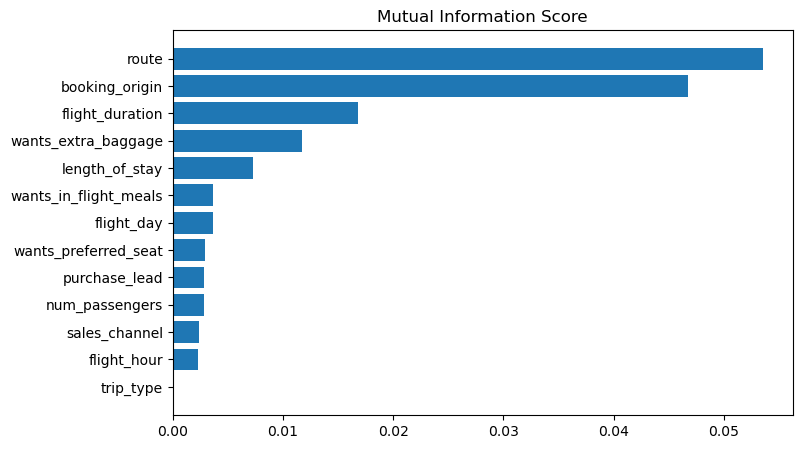

In [20]:
def plot(score):
    score=score.sort_values(ascending=True)
    width=np.arange(len(score))
    tick=list(score.index)
    plt.barh(width,score)
    plt.yticks(width,tick)
    plt.title("Mutual Information Score")
plt.figure(dpi=100,figsize=(8,5))
plot(mi)

In [62]:
from sklearn.model_selection import train_test_split

def data_split(X,y):
    train_full_X,val_X,train_full_y,val_y=train_test_split(X,y,test_size=.2,random_state=0)
    
    train_X,test_X,train_Y,test_y=train_test_split(train_full_X,train_full_y,test_size=.2,random_state=0)
    
    return (train_X,test_X,train_Y,test_y)




In [44]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler=MinMaxScaler()
    scaler.fit(X)
    return X


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

features=['route','booking_origin','flight_duration','wants_extra_baggage','length_of_stay','purchase_lead']
X=df[features]

X=pd.get_dummies(X,columns=features)
# print(X)
X=scale(X)
# print(X)
y=df.booking_complete
train_X,val_X,train_y,val_y=data_split(X,y)
model=RandomForestClassifier(random_state=1)
model.fit(train_X, train_y)
pred=model.predict(val_X)




In [67]:
print("Accuracy",accuracy_score(val_y,pred)*100)
print("ROC",roc_auc_score(val_y,pred))

Accuracy 84.6125
ROC 0.5494744971112635


In [49]:
X=df.drop('booking_complete',axis=1)
X=pd.get_dummies(X)
X=scale(X)
# print(X)
y=df.booking_complete
train_X,val_X,train_y,val_y=data_split(X,y)
model=RandomForestClassifier(random_state=1)
model.fit(train_X, train_y)
pred=model.predict(val_X)

In [50]:
print("Accuracy",accuracy_score(val_y,pred)*100)
print("ROC",roc_auc_score(val_y,pred))

Accuracy 84.93
ROC 0.552220607840723


In [54]:
from xgboost import XGBClassifier


X=df[features]

X=pd.get_dummies(X,columns=features)
X=scale(X)
# print(X)
y=df.booking_complete
train_X,val_X,train_y,val_y=data_split(X,y)
xgbmodel=XGBClassifier(random_state=1)
xgbmodel.fit(train_X, train_y)
pred=xgbmodel.predict(val_X)


In [55]:
print("Accuracy",accuracy_score(val_y,pred)*100)
print("ROC",roc_auc_score(val_y,pred))

Accuracy 84.8
ROC 0.5196827214687274


In [57]:
X=df.drop('booking_complete',axis=1)
X=pd.get_dummies(X)
X=scale(X)
# print(X)
y=df.booking_complete
train_X,val_X,train_y,val_y=data_split(X,y)
xgbmodel=XGBClassifier(random_state=1)
xgbmodel.fit(train_X, train_y)
pred=xgbmodel.predict(val_X)

In [58]:
print("Accuracy",accuracy_score(val_y,pred)*100)
print("ROC",roc_auc_score(val_y,pred))

Accuracy 85.05
ROC 0.5458671249547634
